**Step 1: Import the necessary libraries.**

In [1]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

**Step 2: Download the dataset.**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


**Step 3: Now we will convert the pixels into floating-point values.**

In [3]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

**Step 4: Understand the structure of the dataset**

In [4]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


**Step 5: Visualize the data.**

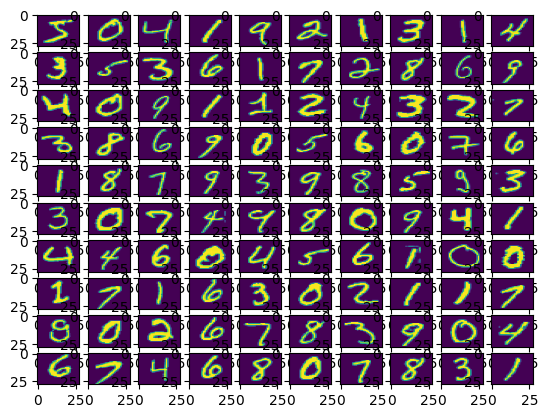

In [5]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
	for j in range(10):
		ax[i][j].imshow(x_train[k].reshape(28, 28),
						aspect='auto')
		k += 1
plt.show()

**Step 6: Form the Input, hidden, and output layers.**

In [6]:
model = Sequential([
	
	# reshape 28 row * 28 column data to 28*28 rows
	Flatten(input_shape=(28, 28)),
	
	# dense layer 1
	Dense(256, activation='sigmoid'),
	
	# dense layer 2
	Dense(128, activation='sigmoid'),
	
	# output layer
	Dense(10, activation='sigmoid'),
])


**Note:**
1. The Sequential model allows us to create models layer-by-layer as we need in a multi-layer perceptron and is limited to single-input, single-output stacks of layers.

2. Flatten flattens the input provided without affecting the batch size. For example, If inputs are shaped (batch_size,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch_size, 1).

3. Activation is for using the sigmoid activation function.

4. The first two Dense layers are used to make a fully connected model and are the hidden layers.

5. The last Dense layer is the output layer which contains 10 neurons that decide which category the image belongs to.

**Step 7: Compile the model.**

In [7]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


**Step 8: Fit the model.**

In [8]:
model.fit(x_train, y_train, epochs=10,
		batch_size=2000,
		validation_split=0.2)


Epoch 1/10
24/24 [==============================] - 3s 76ms/step - loss: 2.0961 - accuracy: 0.3950 - val_loss: 1.7561 - val_accuracy: 0.6973
Epoch 2/10
24/24 [==============================] - 1s 57ms/step - loss: 1.4253 - accuracy: 0.7388 - val_loss: 1.0594 - val_accuracy: 0.8211
Epoch 3/10
24/24 [==============================] - 1s 58ms/step - loss: 0.8807 - accuracy: 0.8239 - val_loss: 0.6794 - val_accuracy: 0.8630
Epoch 4/10
24/24 [==============================] - 1s 56ms/step - loss: 0.6128 - accuracy: 0.8644 - val_loss: 0.5021 - val_accuracy: 0.8881
Epoch 5/10
24/24 [==============================] - 2s 77ms/step - loss: 0.4788 - accuracy: 0.8852 - val_loss: 0.4114 - val_accuracy: 0.8997
Epoch 6/10
24/24 [==============================] - 2s 97ms/step - loss: 0.4054 - accuracy: 0.8977 - val_loss: 0.3590 - val_accuracy: 0.9078
Epoch 7/10
24/24 [==============================] - 1s 55ms/step - loss: 0.3585 - accuracy: 0.9062 - val_loss: 0.3236 - val_accuracy: 0.9149
Epoch 8/10
24

**Note:**
1. Epochs tell us the number of times the model will be trained in forwarding and backward passes.

2. Batch Size represents the number of samples, If it’s unspecified, batch_size will default to 32.

3. Validation Split is a float value between 0 and 1. The model will set apart this fraction of the training data to evaluate the loss and any model metrics at the end of each epoch. (The model will not be trained on this data)

**Step 9: Find accuracy of the model.**

In [9]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)


test loss, test acc: [0.2665160596370697, 0.9258000254631042]


The accuracy of our model is 92.58%.